In [3]:
import os
home_folder = os.path.expanduser("~")
print(home_folder)

C:\Users\liangfeng


In [5]:
# Change this to the location of your dataset
data_folder = os.path.join(home_folder, "Data", "Ionosphere")
data_filename = os.path.join(data_folder, "ionosphere.data")
print(data_folder)
print(data_filename)

C:\Users\liangfeng\Data\Ionosphere
C:\Users\liangfeng\Data\Ionosphere\ionosphere.data


In [11]:
import csv
import numpy as np

# 创建Numpy数组x和y存放数据集，数据集已知
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        #print(X[i])
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'
        #print(y[i])

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# 导入K近邻分类器，并初始化一个实例
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [14]:
# K近邻估计器分析训练集中的数据，比较待分类的新数据点和训练集中的数据，找到近邻
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
# 用测试集测试算法，评价其在测试集上的表现
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [16]:
from sklearn.cross_validation import cross_val_score

In [17]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.3%


In [18]:
# 测试一系列n_neighbors的值，重复实验，观察不同的参数值带来的差异
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [19]:
%matplotlib inline

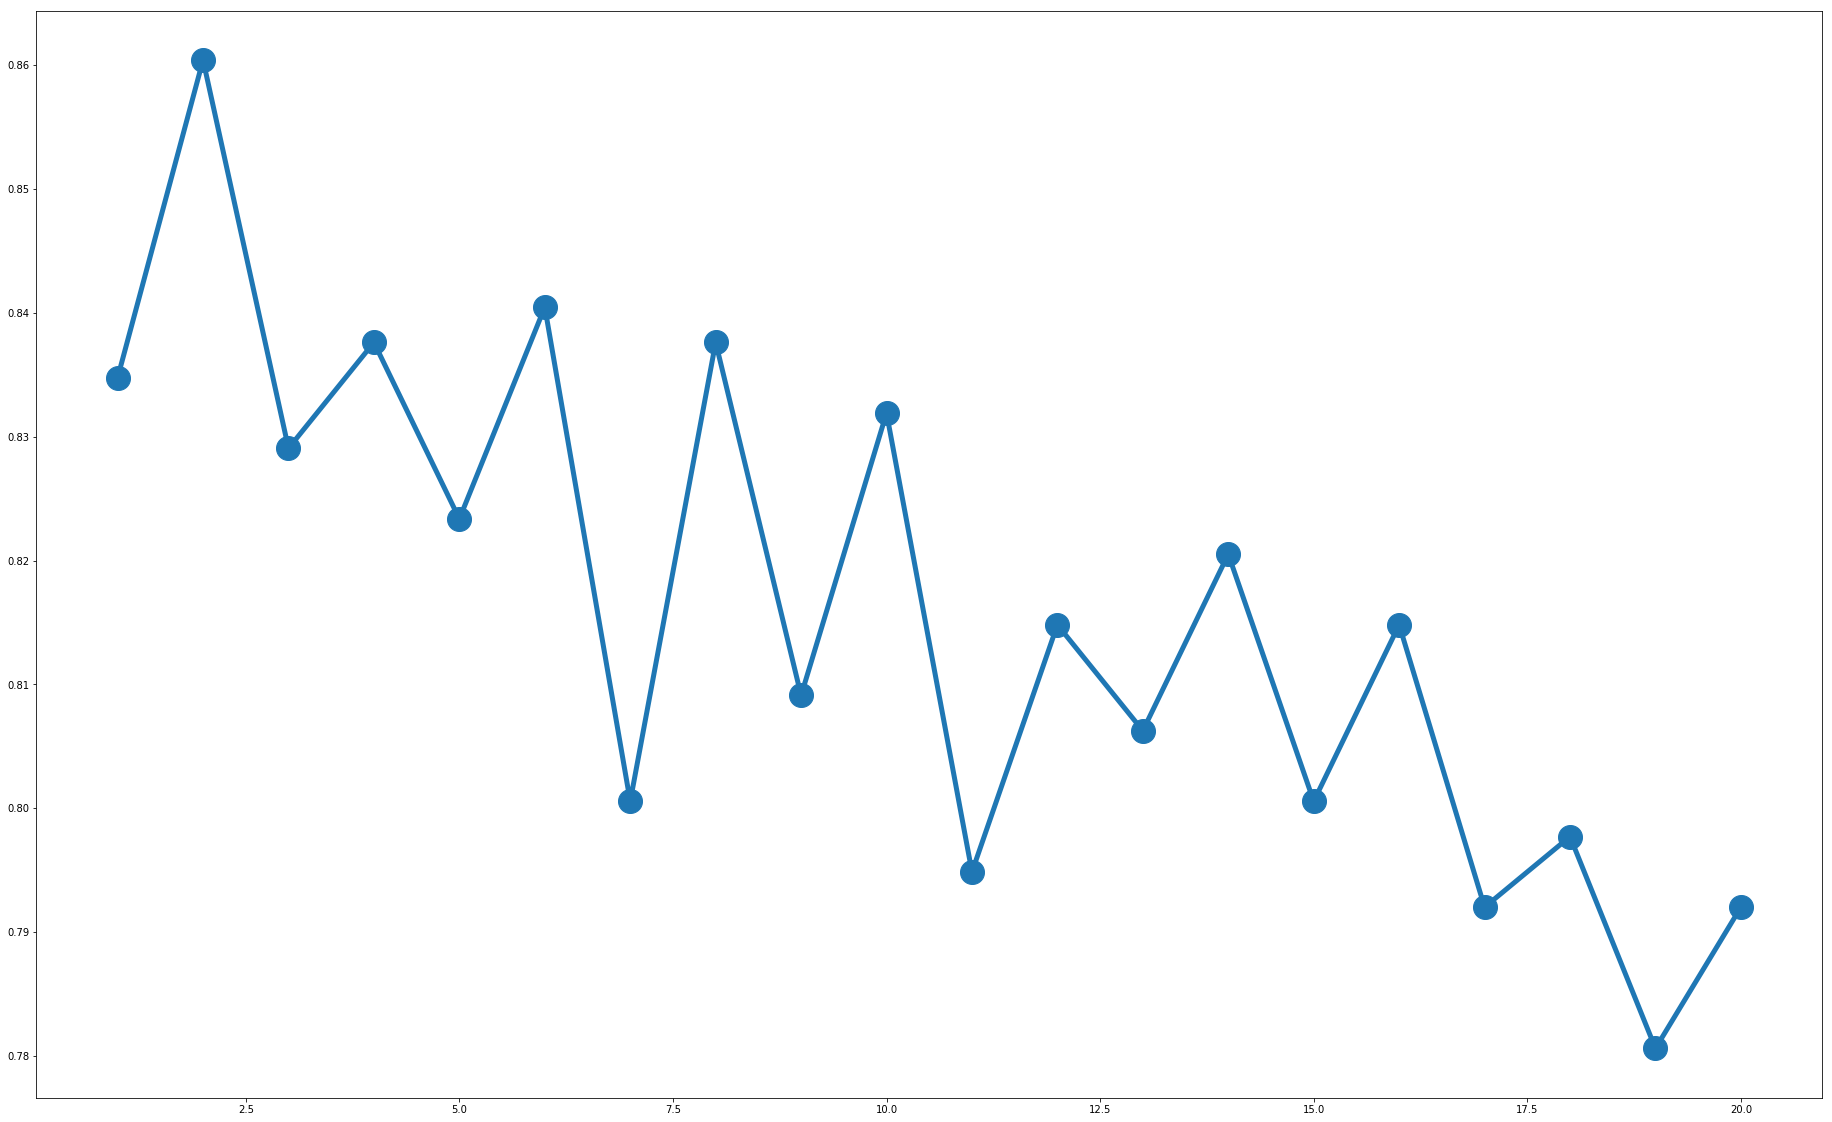

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

In [22]:
x_broken = np.array(X)

In [23]:
x_broken[:,::2] /= 10

In [25]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator,X, y, scoring='accuracy')
print("The original avarage accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, x_broken, y, scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

The original avarage accuracy for is 82.3%
The 'broken' average accuracy for is 71.5%


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# 用MinMaxScaler类进行基于特征的规范化，对数据集x进行预处理
X_tranformed = MinMaxScaler().fit_transform(X)

In [30]:
# MinMaxScaler将特征规范化到相同的值域，这样的特征不会仅仅因为值大而具备更强的区分度
X_tranformed = MinMaxScaler().fit_transform(x_broken)
estimator = KNeighborsClassifier()
tranformed_scores = cross_val_score(estimator,X_tranformed, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(tranformed_scores) * 100))

The average accuracy for is 82.3%


In [31]:
# 小结：异常值会影响近邻算法，不同的算法对值域大小的敏感度不同

In [32]:
# 流水线，用来跟踪代码中对数据集的每一步操作，创建流水线，导入Pipeline对象
from sklearn.pipeline import Pipeline

In [34]:
scaling_pipeline = Pipeline([('scale',MinMaxScaler()),('predict',KNeighborsClassifier())])

In [36]:
scores = cross_val_score(scaling_pipeline,x_broken, y, scoring='accuracy')
print("The pipeline scroed an average accuracy for is {0:.1f}%".format(np.mean(tranformed_scores) * 100))

The pipeline scroed an average accuracy for is 82.3%
